In [1]:
#import the graphing packages
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mplfinance.original_flavor as mpf
from mplfinance.original_flavor import candlestick_ohlc

In [2]:
style.use('dark_background')

In [3]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2021,12, 31)

In [4]:
df = pdr.DataReader('PFE', 'yahoo', start, end)
df_1 = pdr.DataReader('MRNA', 'yahoo', start, end)
df_2 = pdr.DataReader('AZN', 'yahoo', start, end)

In [5]:
df.to_csv('pfizer.csv')
df = pd.read_csv('pfizer.csv', parse_dates=True, index_col=0)
df_1.to_csv('moderna.csv')
df_1 = pd.read_csv('moderna.csv', parse_dates=True, index_col=0)
df_2.to_csv('astrazeneca.csv')
df_2 = pd.read_csv('astrazeneca.csv', parse_dates=True, index_col=0)

In [6]:
print(df)
print(df_1)
print(df_2)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-01-03  33.000000  32.590000  32.700001  33.000000  22190881.0  27.283285
2017-01-04  33.349998  33.029999  33.130001  33.290001  21588216.0  27.523046
2017-01-05  33.689999  33.119999  33.369999  33.610001  20003066.0  27.787613
2017-01-06  33.700001  33.340000  33.660000  33.480000  17474593.0  27.680136
2017-01-09  33.669998  33.380001  33.430000  33.470001  20455130.0  27.671867
...               ...        ...        ...        ...         ...        ...
2021-12-06  53.889999  51.250000  53.779999  51.480000  53723978.0  51.480000
2021-12-07  52.499901  50.400002  51.250000  51.720001  41575442.0  51.720001
2021-12-08  53.080002  51.029999  52.750000  51.400002  37429199.0  51.400002
2021-12-09  52.845001  51.509998  51.509998  52.080002  28251323.0  52.080002
2021-12-10  52.849998  51.110001  51.200001  52.779999  24636447

In [22]:
pd.set_option("display.precision", 2)
print(df)
print(df_1)
print(df_2)

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2017-01-03  33.00  32.59  32.70  33.00  2.22e+07      27.28
2017-01-04  33.35  33.03  33.13  33.29  2.16e+07      27.52
2017-01-05  33.69  33.12  33.37  33.61  2.00e+07      27.79
2017-01-06  33.70  33.34  33.66  33.48  1.75e+07      27.68
2017-01-09  33.67  33.38  33.43  33.47  2.05e+07      27.67
...           ...    ...    ...    ...       ...        ...
2021-12-06  53.89  51.25  53.78  51.48  5.37e+07      51.48
2021-12-07  52.50  50.40  51.25  51.72  4.16e+07      51.72
2021-12-08  53.08  51.03  52.75  51.40  3.74e+07      51.40
2021-12-09  52.85  51.51  51.51  52.08  2.83e+07      52.08
2021-12-10  52.85  51.11  51.20  52.78  2.46e+07      52.78

[1245 rows x 6 columns]
              High     Low    Open   Close    Volume  Adj Close
Date                                                           
2018-12-07   22.75   18.51   22.00   18.60  12995569      18.60
201

Text(0.5, 1.0, 'Pfizer')

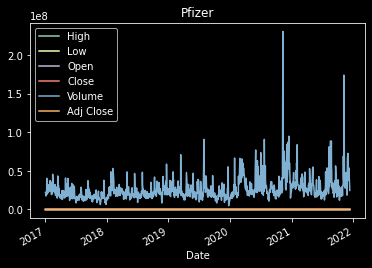

In [23]:
df.plot()
plt.title('Pfizer')

Text(0.5, 1.0, 'Moderna')

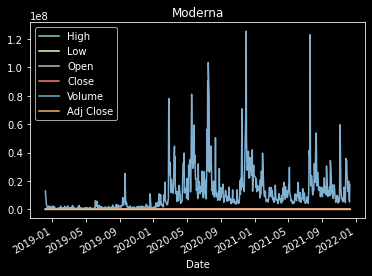

In [24]:
df_1.plot()
plt.title('Moderna')

Text(0.5, 1.0, 'AstraZeneca')

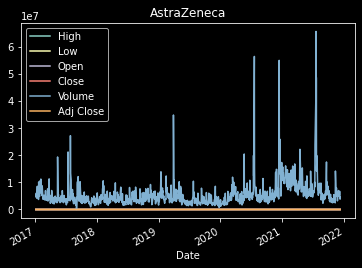

In [25]:
df_2.plot()
plt.title('AstraZeneca')

<AxesSubplot:title={'center':'Pfizer Adjusted Close Data'}, xlabel='Date'>

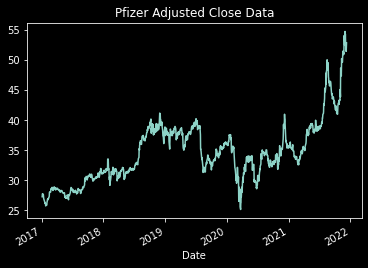

In [12]:
adj_close = df['Adj Close']
plt.title('Pfizer Adjusted Close Data')
adj_close.plot()

<AxesSubplot:title={'center':'Moderna Adjusted Close Data'}, xlabel='Date'>

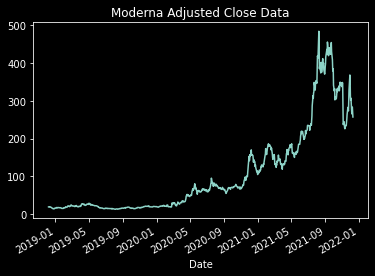

In [13]:
adj_close_1 = df_1['Adj Close']
plt.title('Moderna Adjusted Close Data')
adj_close_1.plot()

<AxesSubplot:title={'center':'AstraZeneca Adjusted Close Data'}, xlabel='Date'>

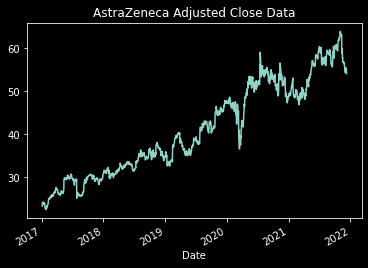

In [14]:
adj_close_2 = df_2['Adj Close']
plt.title('AstraZeneca Adjusted Close Data')
adj_close_2.plot()

In [15]:
sma= adj_close.rolling(window=100, min_periods =0).mean()
sma_1= adj_close_1.rolling(window=100, min_periods =0).mean()
sma_2= adj_close_2.rolling(window=100, min_periods =0).mean()

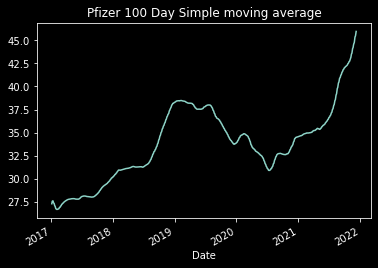

In [16]:
sma.plot()
plt.title('Pfizer 100 Day Simple moving average');

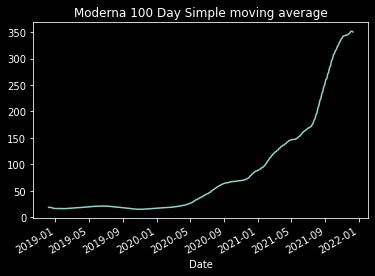

In [17]:
sma_1.plot()
plt.title('Moderna 100 Day Simple moving average');

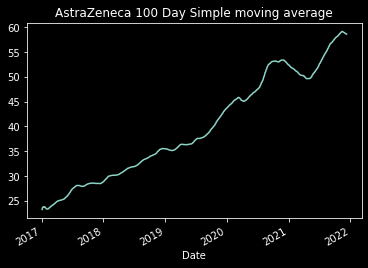

In [18]:
sma_2.plot()
plt.title('AstraZeneca 100 Day Simple moving average');

Text(0.5, 0, 'Year')

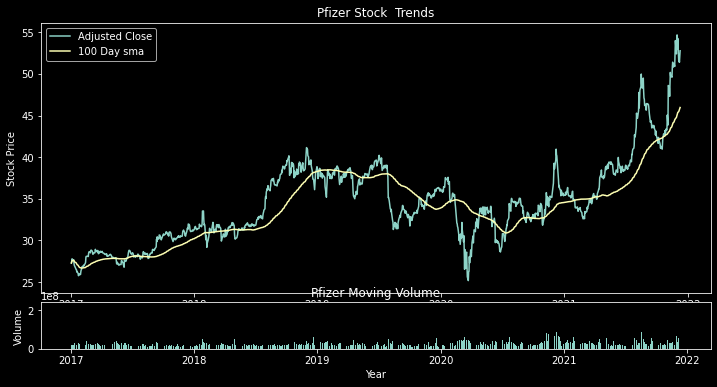

In [19]:
#The size for our chart:
plt.figure(figsize = (12,6))

ax1= plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan =1)
ax2= plt.subplot2grid((6,1), (5,0), rowspan = 2, colspan =1) 
#In our case, we want to use the date, which is the index column, as well as the Adjust Close column.
ax1.plot(df.index, adj_close, label='Adjusted Close')
#And the 100 day moving average to compare the graphs:
ax1.plot(df.index, sma, label ='100 Day sma')
#We can also use a second set of data and a different graph type for the volume numbers:
ax2.bar(df.index, df['Volume'])
#ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# add titles and labels
ax1.set_title('Pfizer Stock  Trends')
ax1.set_ylabel('Stock Price')
ax1.set_xlabel('Year')
ax1.legend()
ax2.set_title('Pfizer Moving Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Year')

Text(0.5, 0, 'Year')

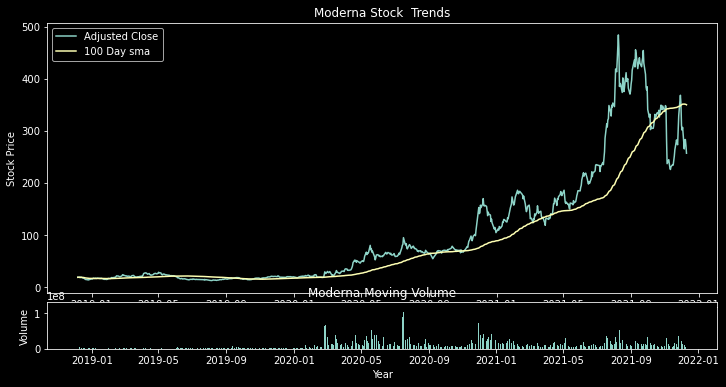

In [20]:
#The size for our chart:
plt.figure(figsize = (12,6))

bx1= plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan =1)
bx2= plt.subplot2grid((6,1), (5,0), rowspan = 2, colspan =1) 
#In our case, we want to use the date, which is the index column, as well as the Adjust Close column.
bx1.plot(df_1.index, adj_close_1, label='Adjusted Close')
#And the 100 day moving average to compare the graphs:
bx1.plot(df_1.index, sma_1, label ='100 Day sma')
#We can also use a second set of data and a different graph type for the volume numbers:
bx2.bar(df_1.index, df_1['Volume'])

# add titles and labels
bx1.set_title('Moderna Stock  Trends')
bx1.set_ylabel('Stock Price')
bx1.set_xlabel('Year')
bx1.legend()
bx2.set_title('Moderna Moving Volume')
bx2.set_ylabel('Volume')
bx2.set_xlabel('Year')

Text(0.5, 0, 'Year')

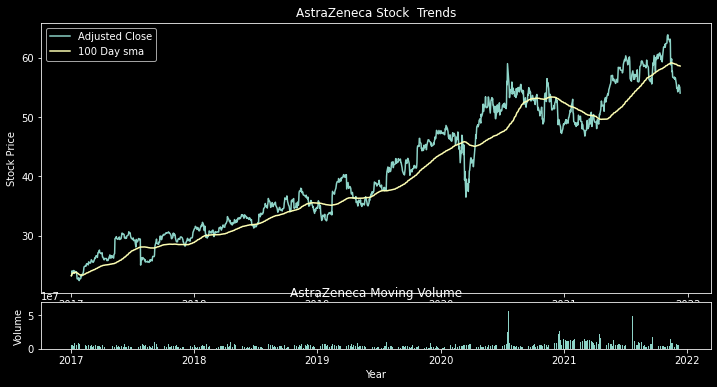

In [21]:
#The size for our chart:
plt.figure(figsize = (12,6))

cx1= plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan =1)
cx2= plt.subplot2grid((6,1), (5,0), rowspan = 2, colspan =1) 
#In our case, we want to use the date, which is the index column, as well as the Adjust Close column.
cx1.plot(df_2.index, adj_close_2, label='Adjusted Close')
#And the 100 day moving average to compare the graphs:
cx1.plot(df_2.index, sma_2, label ='100 Day sma')
#We can also use a second set of data and a different graph type for the volume numbers:
cx2.bar(df_2.index, df_2['Volume'])

# add titles and labels
cx1.set_title('AstraZeneca Stock  Trends')
cx1.set_ylabel('Stock Price')
cx1.set_xlabel('Year')
cx1.legend()
cx2.set_title('AstraZeneca Moving Volume')
cx2.set_ylabel('Volume')
cx2.set_xlabel('Year')